In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_9_descriptive = get_prompt("descriptive", 9)
prompt_9_natural = get_prompt("natural", 9)

prompt_9_descriptive, prompt_9_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area). 8. Simulate for 1ps at 400K. 9. Compute the RMSD of the 400K simulation.',
 'Simulate 1LYZ for 1ps at 300 K and for 1ps at 400K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute SASA and radius of gyration of the 300K simulation. Compute RMSD of both simulations.')

In [3]:
llm_model = "gpt-4o-2024-08-06"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_9_descriptive)

Thought: To complete the tasks, I will proceed step-by-step using the appropriate tools. First, I will download the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1LYZ"
  }
}
```PDB file found with this ID: 1LYZ
To continue with the tasks, I will now proceed to report the secondary structure assignments of the downloaded PDB structure using the ComputeDSSP tool.

Action:
```json
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_024615",
    "target_frames": "first"
  }
}
```To continue with the tasks, I will now find any known binding or active sites for the protein 1LYZ using the GetAllKnownSites tool.

Action:
```json
{
  "action": "GetAllKnownSites",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": ""
  }
}
```To continue with the tasks, I will now set up and run a short simulation of the protein 1LYZ for 1 picosecond at 300 K using the SetUpandRunFunction tool. 

Action:
```json
{
  "ac

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [10]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_024615: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_024615
 rec0_024617: dssp values for trajectory with id: 1LYZ_024615
 1LYZ_024645: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_024653: Initial positions for simulation sim0_024653
 sim0_024653: Basic Simulation of Protein 1LYZ_024645
 rec0_024654: Simulation trajectory for protein 1LYZ_024645 and simulation sim0_024653
 rec1_024654: Simulation state log for protein 1LYZ_024645 and simulation sim0_024653
 rec2_024654: Simulation pdb frames for protein 1LYZ_024645 and simulation sim0_024653
 rmsd_024653: RMSD for 024653
 fig0_024707: RMSD plot for 024653
 rgy_rec0_024654: Radii of gyration per frame for rec0_024654
 fig0_024709: Plot of radii of gyration over time for rec0_024654
 sasa_sim0_024653: Total SASA values for sim0_024653
 fig0_024739: Plot of SASA over time fo

In [23]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_024615"))

In [22]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_024615", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [21]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [20]:
# make sure trajectory and topology exist (sim1)
traj_path_1_1 = registry_1.get_mapped_path("rec0_024654")
top_path_1_1 = registry_1.get_mapped_path("top_sim0_024653")

assert os.path.exists(traj_path_1_1)
assert os.path.exists(top_path_1_1)

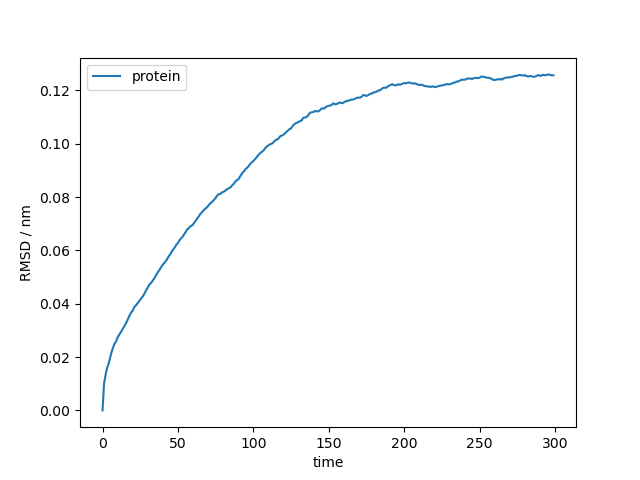

In [19]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_024707'))

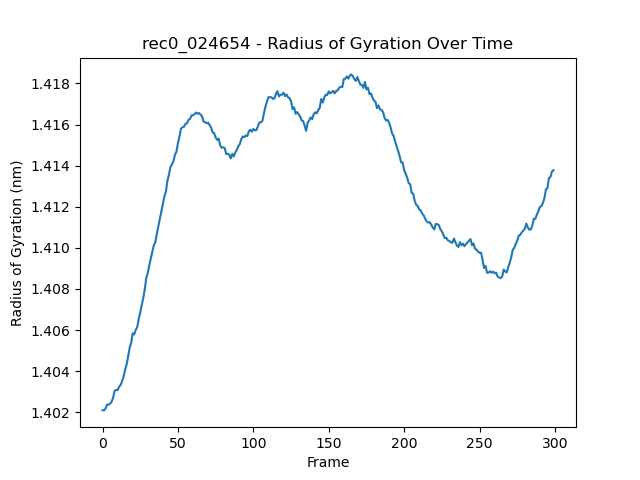

In [18]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_024709'))

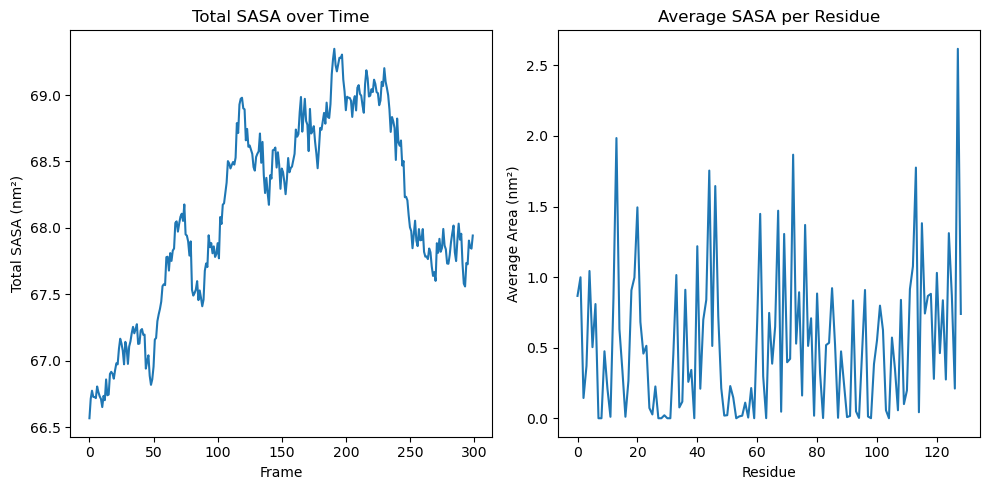

In [17]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_024739'))

In [16]:
# make sure trajectory and topology exist (sim2)
traj_path_1_2 = registry_1.get_mapped_path("rec0_024756")
top_path_1_2 = registry_1.get_mapped_path("top_sim0_024756")

assert os.path.exists(traj_path_1_2)
assert os.path.exists(top_path_1_2)

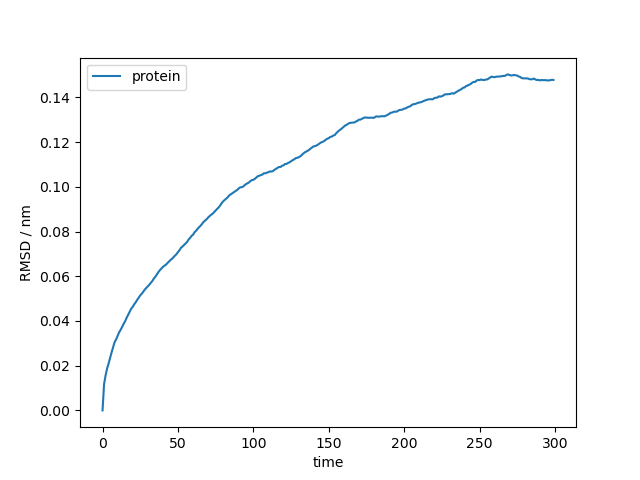

In [15]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_024812'))

In [24]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_9_natural)

Thought: To address the question, I need to perform several tasks: download the PDB file for 1LYZ, set up and run simulations at 300 K and 400 K, compute secondary structure assignments, identify binding or active sites, compute SASA and radius of gyration for the 300 K simulation, and compute RMSD for both simulations. I will start by downloading the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
To proceed, I need to set up and run simulations for the downloaded PDB file (1LYZ) at 300 K and 400 K. After that, I will compute the secondary structure assignments, identify binding or active sites, compute SASA and radius of gyration for the 300 K simulation, and compute RMSD for both simulations. I will start by setting up and running the simulation at 300 K.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_025318",
    "forcefield_files": ["amber99sb.xml",

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [25]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_025318: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_025318


In [26]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_025318"))